<a href="https://colab.research.google.com/github/DiegoAlves-data/DiegoAlves-data/blob/master/Dados_airbnb_Bordeaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


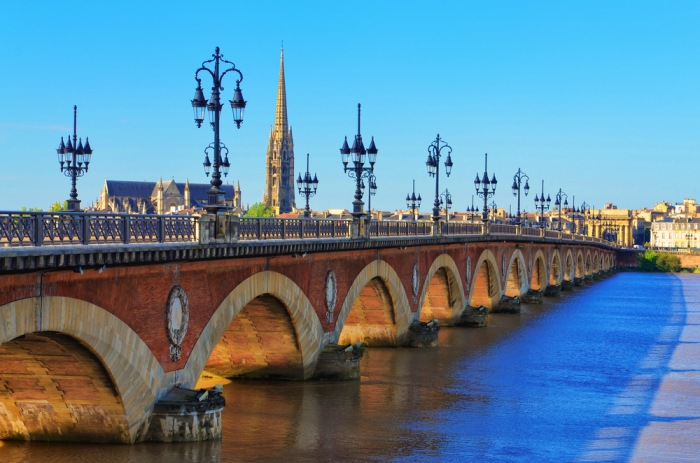

---

# Bordeaux: a cidade do Vinho e da boa hospedagem - *Uma Análise do Airbnb*

A cidade de Bordeaux, na França, é conhecida por seus excelentes vinhos, aliás, não só por isso, mas também por ser um ótimo para o turismo histórico. Neste estudo utilizamos a base de dados aberta do Airbnb para entender um pouco a distribuição e disponibilidade dos locais para hospedagem, bem como do valor médio praticado.

Observamos algumas correlações interessantes, por exemplo, entre a maior concentração de propriedades disponíveis e um menor valor médio por área. 

Acompanhe o passo a passo abaixo e se prepare para sua próxima viagem. 
Ahhh... um detalhe importante: se for utilizar o Airbnb em Boardeux, se prepare para ficar ao menos 4 dias, pois a média de tempo mínimo aceito é essa. Mas com tanta coisa legal para conhecer, não haverá problema!


Base retirada do site [Airbnb](http://insideairbnb.com/get-the-data.html) 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Obtenção dos Dados


In [ ]:
#  importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# importing AirBnb Bourdeaux Data into a Data frame
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Datasets/bordeaux_airbnb.csv')

## Data analysis


**Variable Dictionary**

* id - id number generated to identify the property
* name - name of advertised property
* host_id - id number of the owner (host) of the property
* host_name - Hostname
* neighborhood_group - this column contains the name assigned to the neighborhood's  group.
* neighborhood - name of the neighborhood
* latitude - property latitude coordinate
* longitude - longitude coordinate of the property
* room_type - informs the type of room that is offered
* price - price to rent the property
* minimum_nights - minimum number of nights to book
* number_of_reviews - number of reviews the property has
* last_review - date of last review
* reviews_per_month - amount of reviews per month
* calculated_host_listings_count - amount of properties from the same host
* availability_365 - number of days of availability within 365 days



In [ ]:
# show the first and last 10 entries
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,28925,Grande maison centre ville Comme à la campagne,124398,Laurence,Bordeaux,Centre ville (Bordeaux),44.85024,-0.59209,Entire home/apt,234,2,2,2017-09-10,0.05,1,144
1,218103,B&B Apart.Suite / tropical garden,1127981,Luis,Bgles,Bgles,44.81545,-0.54808,Entire home/apt,110,2,45,2013-07-05,0.40,4,123
2,222887,"Bordeaux Terrace - spectacular view, fast Wifi",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83611,-0.56640,Entire home/apt,202,3,43,2019-11-11,0.72,4,197
3,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.84782,-0.58105,Entire home/apt,145,3,26,2019-12-29,0.47,4,193
4,317658,"Key to Bordeaux - fairytale view, 2 bd + elevator",1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.83882,-0.56887,Entire home/apt,202,3,61,2020-01-20,0.77,4,198
5,333031,STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.84256,-0.57794,Entire home/apt,79,1,341,2019-09-23,3.02,2,361
6,333592,Charming apt with terrace center town,1699300,Alexandre,Bordeaux,Centre ville (Bordeaux),44.84583,-0.58306,Entire home/apt,101,2,40,2019-07-11,0.41,1,0
7,344869,Cosy studio center of Bordeaux,1749523,Fabienne,Bordeaux,Centre ville (Bordeaux),44.84598,-0.58970,Entire home/apt,50,3,128,2017-07-10,1.15,3,121
8,365993,Modern&comfortable 3 rooms apart,1847986,Damien,Bgles,Bgles,44.81149,-0.55825,Entire home/apt,116,5,36,2019-07-06,0.32,2,325
9,408270,B&B Bedroom N°2 / tropical garden,1127981,Luis,Bgles,Bgles,44.81562,-0.54787,Entire home/apt,90,2,95,2014-09-15,0.87,4,125


In [ ]:
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10606,50861642,Chambre privée sur jardin avec piscine,85893067,Émilie,Le Bouscat,Le Bouscat,44.864195,-0.612062,Private room,105,3,0,NaN,NaN,1,353
10607,50861950,Charmant 2 pièces Bordeaux centre idéalement p...,7528236,Philippe,Bordeaux,Bordeaux Sud,44.828069,-0.563341,Entire home/apt,84,1,0,NaN,NaN,1,349
10608,50868657,"Bel appartement tout confort parking, tram di...",10378678,Jessica,Bordeaux,La Bastide,44.854147,-0.538792,Entire home/apt,65,3,0,NaN,NaN,2,278
10609,50869486,"Logement plein de charme, au centre de Bordeaux",201746568,Tommy,Bordeaux,Centre ville (Bordeaux),44.850696,-0.592547,Entire home/apt,120,6,0,NaN,NaN,1,14
10610,50871790,L’Atypique à 2min de la Gare - Coup de cœur 🧡🐅,321162574,Coralie,Bordeaux,Bordeaux Sud,44.826541,-0.559329,Entire home/apt,88,2,0,NaN,NaN,12,364
10611,50874250,appartement 4 pers quartier Chartrons à Bordeaux,32486742,Sandra,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.853468,-0.579429,Entire home/apt,70,1,0,NaN,NaN,8,332
10612,50874592,appartement plein coeur du centre historique,162782755,Fabien,Bordeaux,Centre ville (Bordeaux),44.839627,-0.570570,Entire home/apt,66,2,0,NaN,NaN,1,355
10613,50880888,loue chambre dans échoppe avec jardin et tout ...,89306093,Christel,Bgles,Bgles,44.806744,-0.552497,Private room,35,1,0,NaN,NaN,2,364
10614,50885459,😍 Grande Maison au Bouscat proche Bdx centre 😍,409664047,Laure,Le Bouscat,Le Bouscat,44.868034,-0.618562,Entire home/apt,250,7,0,NaN,NaN,1,15
10615,50895580,❤ Loft Industriel tout équipé de 70m2 ❤,176707681,Melanie,Bordeaux,Caudran,44.839456,-0.605685,Entire home/apt,61,3,0,NaN,NaN,1,40


###**Understanding the Data**

**Question-01**. How many attributes (variables) and how many entries does our dataset have? What types of variables?

In [ ]:
# identifing DataFrame data volume
print ("Entries:\t{}".format (df.shape[0]))
print ("Variables:\t{}".format (df.shape[1]))


Entries:	10616
Variables:	16


In [ ]:
# understanding data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10616 non-null  int64  
 1   name                            10615 non-null  object 
 2   host_id                         10616 non-null  int64  
 3   host_name                       10612 non-null  object 
 4   neighbourhood_group             10616 non-null  object 
 5   neighbourhood                   10616 non-null  object 
 6   latitude                        10616 non-null  float64
 7   longitude                       10616 non-null  float64
 8   room_type                       10616 non-null  object 
 9   price                           10616 non-null  int64  
 10  minimum_nights                  10616 non-null  int64  
 11  number_of_reviews               10616 non-null  int64  
 12  last_review                     

### **Reviewing Data Balance**

**Question-02** What is the percentage of missing values in the *dataset*?

* We can see that the data is extremely balanced;
* Just the columns *last_review* and *reviews_per_month*  have null values in a significant amount;

In [ ]:
# showing the sum of missing values
df.isnull().sum()


id                                   0
name                                 1
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2084
reviews_per_month                 2084
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
# showing the percentage of missing values
df.isnull().sum() / df.shape[0]*100

id                                 0.000000
name                               0.009420
host_id                            0.000000
host_name                          0.037679
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       19.630746
reviews_per_month                 19.630746
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

### **Viewing distributions in graphs**

**Question-03** What is the type of distribution of variables?



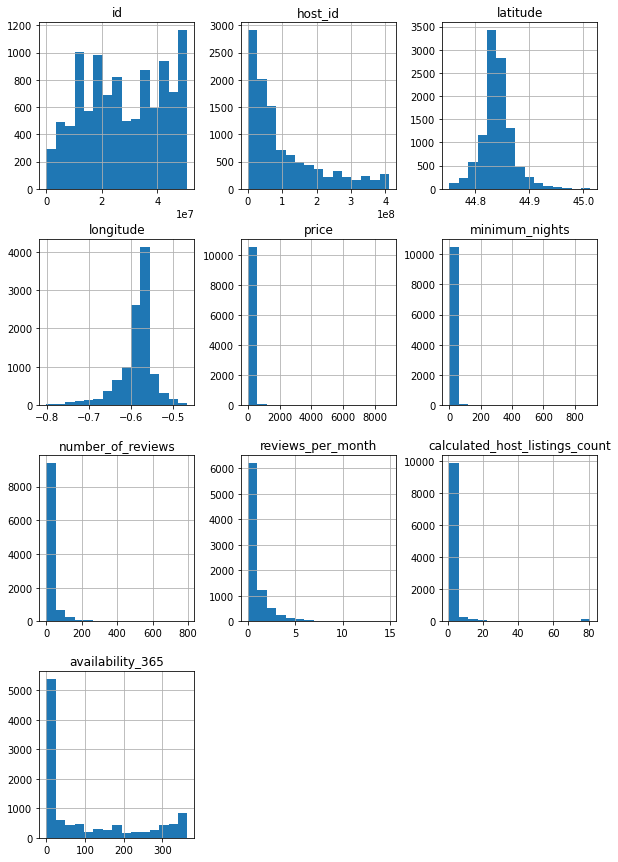

In [ ]:
# plotting the histogram of numerical variables
df.hist(bins=15, figsize=(10,15));


### **Understanding de *rental price***
**Question -04** What is the average rental price?

In [ ]:
# see the average of the *price* column
df.price.mean()


95.35634890730972

In [ ]:
df.price.describe()

count    10616.000000
mean        95.356349
std        139.459243
min          0.000000
25%         45.000000
50%         65.000000
75%        100.000000
max       8890.000000
Name: price, dtype: float64

In [ ]:
df.price.value_counts()


50      527
60      479
70      368
40      364
45      351
       ... 
1035      1
763       1
281       1
683       1
1463      1
Name: price, Length: 381, dtype: int64

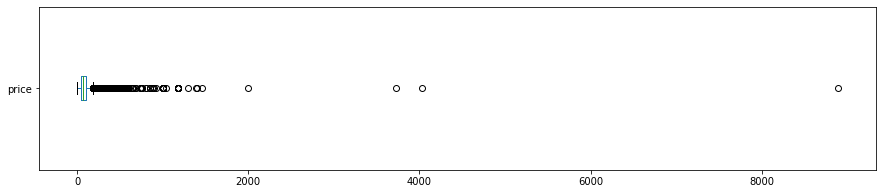

In [ ]:
# boxplot to view price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [ ]:
# see amount of values above 1000 for price

print("\nprice: values above 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))


price: values above 1000
17 entradas
0.1601%


#### Treating *outliers* to improve the average price.

Once we've identified the *outliers* in the prices, we'll clean them up to more accurately average value.

In [ ]:
# remove the outliers (above 1000) from the *price* variable
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)

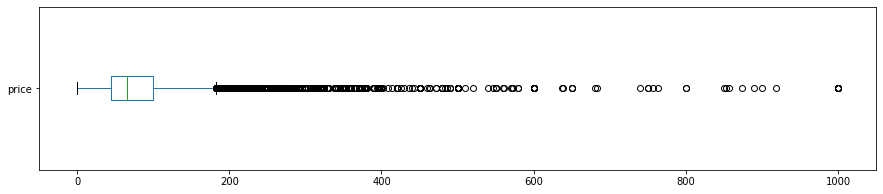

In [ ]:
# new boxplot to view price without outliers
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

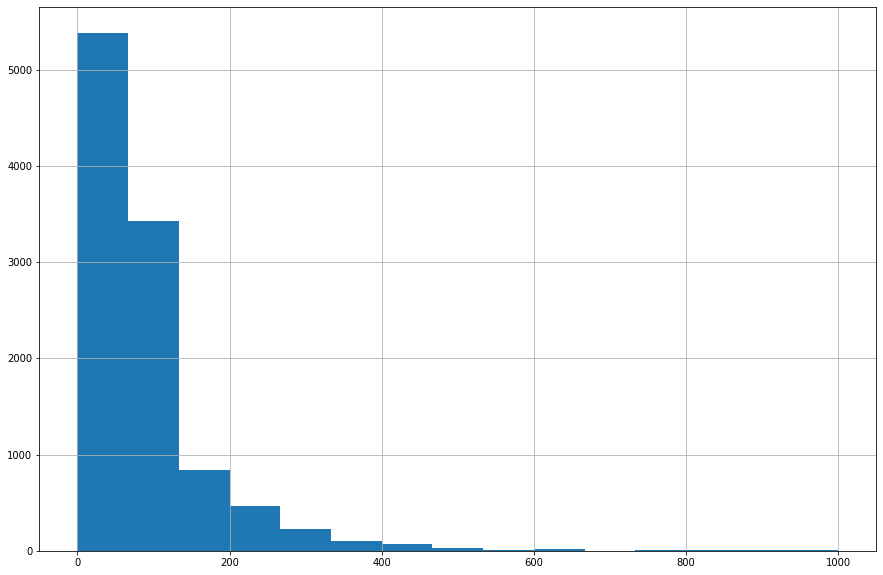

In [ ]:
# plot price histogram
df_clean.price.hist(bins=15, figsize=(15,10));

In [ ]:
# average price without outliers
df_clean.price.describe()

count    10599.000000
mean        92.238702
std         86.727327
min          0.000000
25%         45.000000
50%         65.000000
75%        100.000000
max       1000.000000
Name: price, dtype: float64

In [ ]:
df_clean['price'].median()

65.0

### **Correlation**
**Question-04** What is the correlation between the variables?

In [ ]:
# create a correlation matrix

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# show the correlation matrix

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.015247,-0.072566,-0.092820,0.115276,0.137354
minimum_nights,0.015247,1.000000,-0.043328,-0.054061,0.258953,0.073793
number_of_reviews,-0.072566,-0.043328,1.000000,0.668936,-0.036598,0.177391
reviews_per_month,-0.092820,-0.054061,0.668936,1.000000,-0.013860,0.223013
calculated_host_listings_count,0.115276,0.258953,-0.036598,-0.013860,1.000000,0.204439
availability_365,0.137354,0.073793,0.177391,0.223013,0.204439,1.000000


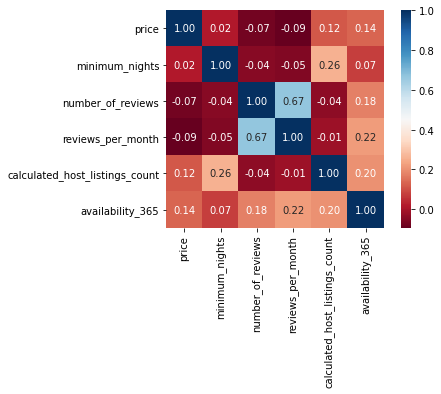

In [ ]:
# plot a heatmap from the correlations

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Properties**
**Question_05** 
What is the most rented property type on Airbnb?


The room_type variable column indicates the type of rental that is advertised on Airbnb. If you've already rented on the site, you know that there are options for apartments/entire houses, just renting a room or even sharing a room with other people.

Let's count the number of occurrences of each type of rental, using the value_counts() method.

In [ ]:
# amount of each type of property
df_clean.room_type.value_counts()

Entire home/apt    8168
Private room       2320
Shared room          68
Hotel room           43
Name: room_type, dtype: int64

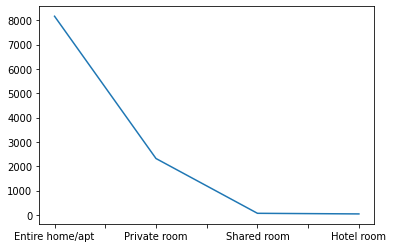

In [ ]:
# show the amount of each type of property available
df_clean.room_type.value_counts().plot()


In [ ]:
# show the percentage of each type of property available
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    77.063874
Private room       21.888857
Shared room         0.641570
Hotel room          0.405699
Name: room_type, dtype: float64

### **The most expensive neighborhood**
**Question-06** What is the most expensive location in the dataset?

Using the group_by function. The objective is to group neighborhoods by rental price. 

An important fact that we can understand from the analysis supports the maintenance of the law of supply and demand: the more properties available in certain locations, the more the average value tends to decrease.



In [ ]:
# see prices by neighborhood, on average
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Toctoucau              222.625000
Bouliac                186.702703
Martignas-sur-Jalle    184.851852
Saint-Aubin-de-Mdoc    184.565217
Magonty                167.419355
Le Taillan-Mdoc        149.808824
Chemin Long            138.133333
Parempuyre             137.612903
Blanquefort            135.072289
Caudran                125.677130
Name: price, dtype: float64

In [ ]:
#  seeing the total properties in some neighborhoods
print (df_clean [df_clean.neighbourhood == "Toctoucau"].shape)

(8, 16)


In [ ]:
print (df_clean [df_clean.neighbourhood == "Magonty"].shape)

(31, 16)


In [ ]:
print (df_clean [df_clean.neighbourhood == "Caudran"].shape)

(446, 16)


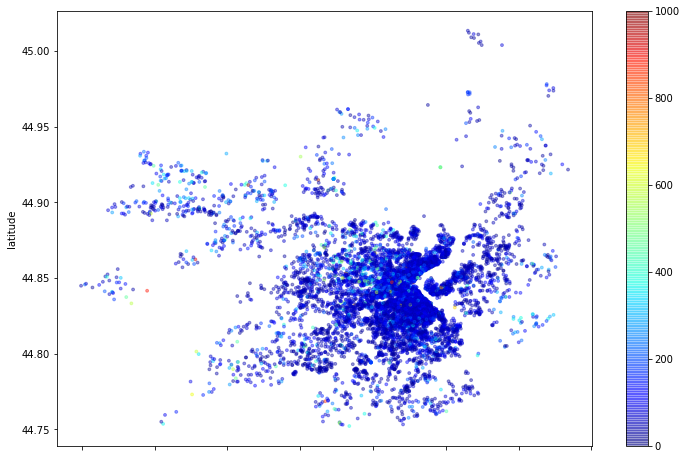

In [ ]:
# plot properties by latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Average of minimu nights offer by hostings**
**Question-07** 
What is the average minimum rental nights (minimum_nights)?


In [ ]:
# average of minimum rental nights

df_clean.minimum_nights.mean()

4.864515520332107

## **Conclusões**


Bordeaux is a tourist town, known for its wineries and its history dating back to the Middle Ages. In this analysis, we were able to follow some interesting data:
> The average value per day is 92 dollars, however when applying the average the value appears to be fairer, with a result shown of 65 dollars.

> About 77% of the occupations offered are in "entire rooms / apt" which suggests that the demand for these formats is also high.

> The most expensive neighborhoods are those that offer the fewest places available for rent.

> 







